In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)

import JY_Toolkit
from JY_Toolkit import Jy_makeDataset

random_seed = 5225
np.random.seed(random_seed)

import logging

logging.basicConfig(level=logging.INFO)

logging.info(f'logging level = INFO')
logging.debug(f'logging level = DEBUG')
# logging.warnings(f'logging level = warn')



INFO:root:logging level = INFO


## 构筑双月数据集
- 双月圆心水平距离 hor_distance = 2
- 双月圆心垂直距离 ver_distance = -1
- 双月半径 radius = 2
- 双月线宽 width = 1
- 双月数据集总共样本数 m = 1000

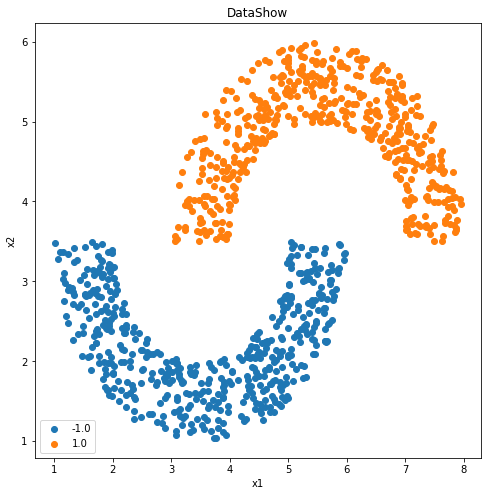

In [3]:
Jy_makeDataset.random_state(random_seed)
X,y = Jy_makeDataset.draw_HalfMoon(n_sample=1000,
                                   radius=2,
                                   hor_distance=2,
                                   ver_distance=0,
                                   positive_val=1,
                                   negative_val = -1
                                   )
X_train,X_test,y_train,y_test = JY_Toolkit.Jy_dataSetProcess.Jy_train_test_split(X,y)      
JY_Toolkit.Jy_dataShow.show_TwoDimData(X,y)                             

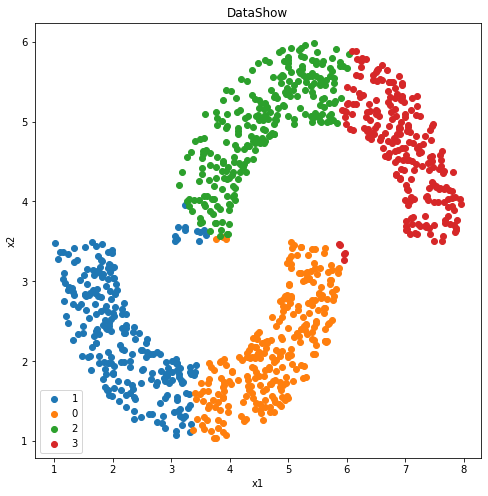

1


In [4]:
import random

class K_means(object):
    
    def __init__(self,
                n_clusters : int,
                *,
                k_choose = 'randomly',
                max_iter = 50,
                tol = 1e-5):
        '''

        Parameters:

        n_clusters : int , should be specified.
                n_clusters is the number of cluster that dataset will be clustering.

        k_choose :  one of {'randomly','sample'},default = 'randomly'
                The selection strategies for k centroids initialization.

        max_iter : int 
                The maximum number of iterations. if _iter == max_iter , the iterations will stop.

        tol : float64
                If the difference between this iteration and the last iteration less than the tol, 
            the iterations will stop
        '''

        init_path = {'randomly': self.random_n_clusters ,'sample':self.sample_n_clusters}
        self.n_clusters = n_clusters
        if k_choose not in init_path:
            logging.warning(f'k_choose : {k_choose} ,not a valid input , k_choose should be in [randomly,sample]')
        self.init = init_path[k_choose]
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = []
        self.centroids_last = None
        # self.diff = []        



    def random_n_clusters(self,X,*,random_state = None):
        if random_state is not None:
            random.seed(random_state)
        x_min = np.amin(X,0)
        x_max = np.amax(X,0)

        # flag = False
        # while flag:

        res = []
        for i in range(self.n_clusters):
            temp_point = []
            for i in range(len(x_min)):
                temp = random.uniform(x_min[i], x_max[i])
                temp_point.append(temp)
            # temp_point = np.asarray(temp_point)
            res.append(temp_point)
        res = np.asarray(res)

        # 验证取点是否合法
        C = []
        for i in range(self.n_clusters):
            temp = []
            C.append(temp)
        for x in X:
            # 计算每个点离质心的距离
            dis_list = []
            for c in res:
                # 计算质心
                dis_list.append(K_means.get_distance(x, c))
            # 将点划分到对应的簇
            C[dis_list.index(min(dis_list))].append(x)


        for c in C:
            if len(c) == 0:
                return self.random_n_clusters(X=X,random_state=random_state)
                pass
        return res

    def sample_n_clusters(self,X,*,random_state = None):
        # if random_state is not None:
        #     np.random.seed(random_seed)
        # # res = []
        # res = X.random.sample(self.n_clusters)

        if random_state is not None:
            random.seed(random_state)

        res = random.sample(list(X), self.n_clusters)
        # logging.info(f'sample init : {np.asarray(res)}')
        
        return np.asarray(res)

    def get_distance(x1,x2):
        try:
            diff = x1-x2
            return (diff*diff).sum()
        except:
            # print(f' x1: {x1} \n shape : {x1.shape} \n type : {type(x1)}')
            # print(f' x1: {x2} \n shape : {x2.shape} \n type : {type(x2)}')
        # diff = x1-x2
            pass

    def fit(self,X):
        self.centroids.clear()
        self.centroids.append(self.init(X))
        C = []
        for i in range(self.n_clusters):
            temp = []
            C.append(temp)
        
        for _iter in range(self.max_iter):
            
            for x in X:
                # 计算每个点离质心的距离
                dis_list = []
                for c in self.centroids[-1]:
                    # 计算质心
                    dis_list.append(K_means.get_distance(x, c))
                # 将点划分到对应的簇
                C[dis_list.index(min(dis_list))].append(x)

            if _iter == 0:
                for c in C:
                    if len(c) == 0:
                        return False

            # 对质心进行更新
            new_centroids = []
            for i in range(self.n_clusters):
                temp_array = np.asarray(C[i])
                new_centroids.append(temp_array.sum(0)/len(temp_array))  # 分母可能为 0 
                C[i].clear()
            self.centroids.append(np.asarray(new_centroids)) # .reshape(self.n_clusters,len(X[0]))
            # print(_iter,new_centroids)
            if K_means.get_distance(self.centroids[-1], self.centroids[-2]) < self.tol:
                break
        self.centroids_last = self.centroids[-1]
        return True
    
    def predict(self,X):
        
        # res = []
        # for i in range(self.n_clusters):
        #     temp = []
        #     res.append(temp)
        label = []
        for x in X:
            dis_list = []
            for c in self.centroids_last:
                dis_list.append(K_means.get_distance(x, c))
            label.append(dis_list.index(min(dis_list)))

        return np.asarray(label)                

    pass

count = 0
    
kmeans = K_means(n_clusters=4)
count += kmeans.fit(X_test)
label = kmeans.predict(X)
JY_Toolkit.Jy_dataShow.show_TwoDimData(X,label)

    # kmeans = K_means(n_clusters=4,k_choose='sample')
    # kmeans.fit(X_test)
    # label = kmeans.predict(X)

    # JY_Toolkit.Jy_dataShow.show_TwoDimData(X,label)


print(count)

## sklearn.cluster.KMeans 测试

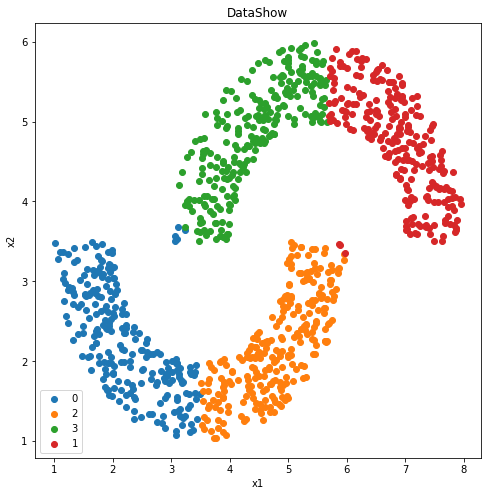

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,init='random',random_state = random_seed).fit(X)

JY_Toolkit.Jy_dataShow.show_TwoDimData(X,kmeans.labels_)    